## Central Limit Theorem

`The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. Furthermore, all of the samples will follow an approximate normal distribution pattern, with all variances being approximately equal to the variance of the population divided by each sample’s size.`

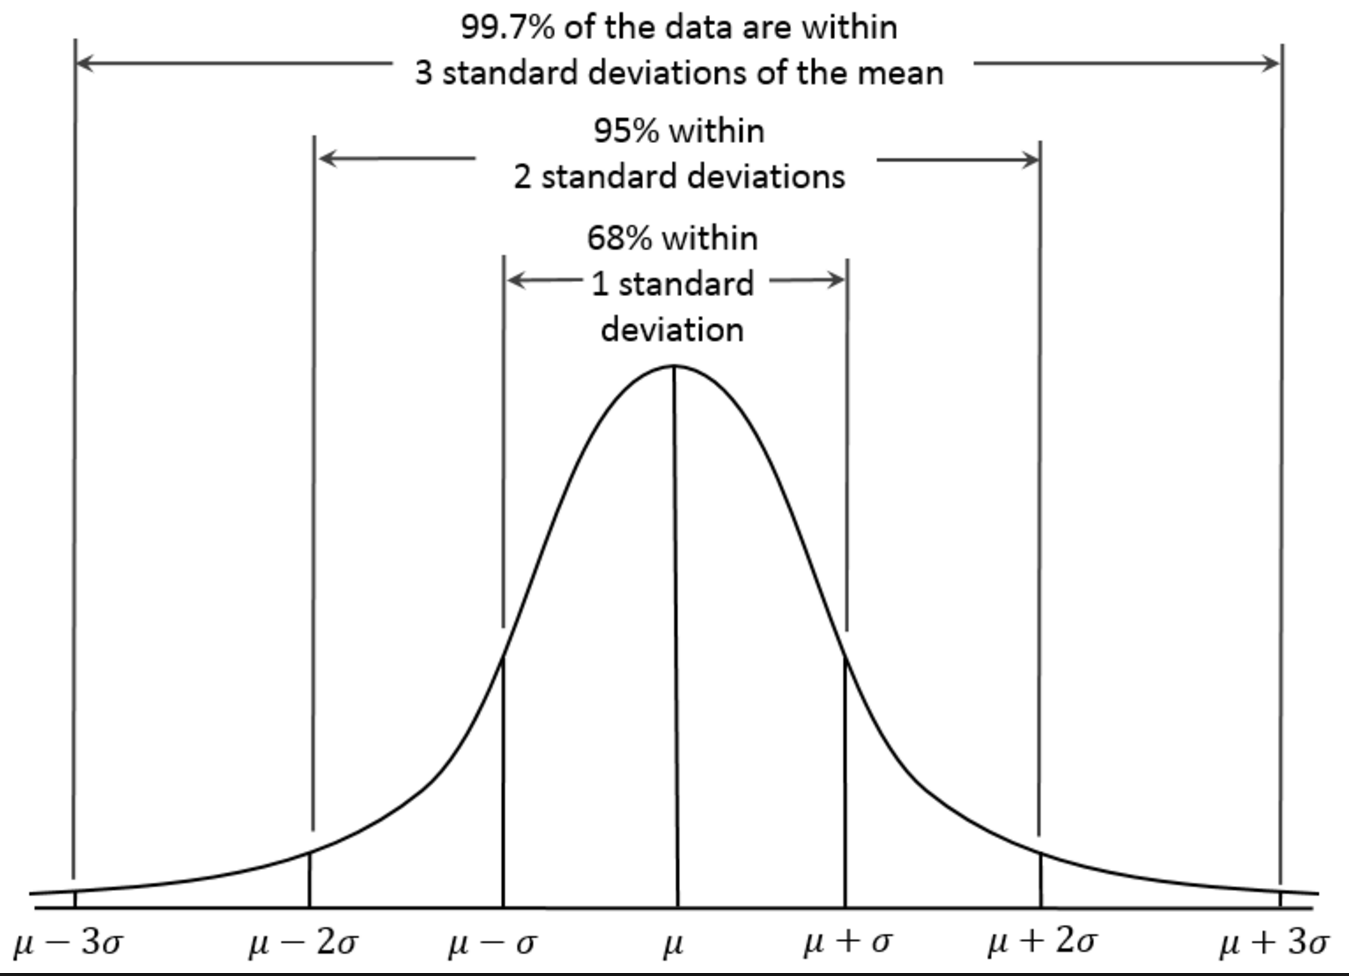

In [2]:
## Proving CLT

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed = 42

%matplotlib inline

In [4]:
# Avoid Warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("Adults.csv")

In [6]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [7]:
df.shape

(48842, 15)

In [8]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Verfiying CLT for Age Column

- Mean of Age column: 38.64

<AxesSubplot:xlabel='age', ylabel='Density'>

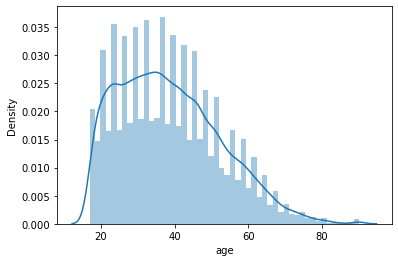

In [10]:
sns.distplot(df['age'])

In [11]:
df['age'].skew()

0.5575803166133181

In [12]:
## Age column is normally distributed with +ve skewness of 0.557

In [13]:
# Number of rows

print('Total number of rows: {}'.format(df.shape[0]))

Total number of rows: 48842


### Sampling

In [14]:
rows = df.shape[0]

samples = random.sample(range(0,rows),50)

In [15]:
# print(samples)

In [16]:
df.iloc[samples]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
37918,55,Self-emp-not-inc,194065,Assoc-acdm,12,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
30310,25,State-gov,187508,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
27649,22,Private,214716,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
28454,55,Local-gov,99131,HS-grad,9,Married-civ-spouse,Prof-specialty,Other-relative,White,Female,0,2246,40,United-States,>50K
17261,49,Private,123207,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,44,United-States,<=50K
11768,48,Private,235891,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,Puerto-Rico,<=50K
30353,27,Private,183523,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
45372,29,Private,214702,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,1974,35,United-States,<=50K
39025,44,Self-emp-not-inc,194636,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,3137,0,50,United-States,<=50K
2882,22,Private,213310,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,35,United-States,<=50K


In [17]:
mean_sample = np.mean(df.iloc[samples]['age'])

print('Mean of Sample : {}'.format(mean_sample))

Mean of Sample : 38.26


In [18]:
sample_mean = {}

means = []

# Creating 100 samples with 50 elements each
for i in range(0, 100):
    
    samples = random.sample(range(0, df.shape[0]), 50)
    
    means.append(df.iloc[samples, 0].mean())

sample_mean['100sam_50ele'] = means

In [19]:
#sample_mean

In [20]:
mean = np.mean(sample_mean['100sam_50ele'])
print(mean)

38.2094


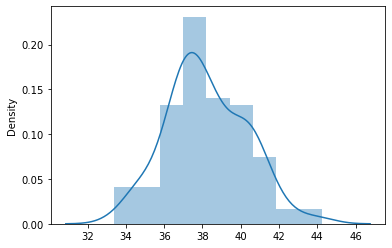

In [21]:
sns.distplot(np.array(sample_mean['100sam_50ele']))
plt.show()

In [22]:
sample_mean = {}

means = []

# Creating 100 samples with 100 elements each
for i in range(0, 100):
    
    samples = random.sample(range(0, df.shape[0]), 100)
    
    means.append(df.iloc[samples, 0].mean())

sample_mean['100sam_100ele'] = means

In [23]:
mean = np.mean(sample_mean['100sam_100ele'])
print(mean)

38.7919


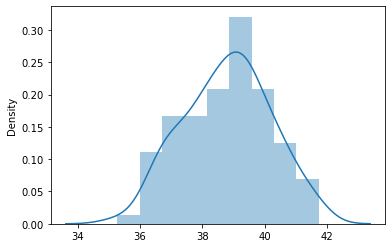

In [24]:
sns.distplot(np.array(sample_mean['100sam_100ele']))
plt.show()

In [25]:
# Defining a function sampleMean which takes number of samples and number of elements in each sample

def sampleMean(num_samp , ele_samp):

    means = []

    # Creating 100 samples with 100 elements each
    for i in range(0, num_samp):

        samples = random.sample(range(0, df.shape[0]), ele_samp)

        means.append(df.iloc[samples, 0].mean())
        
    return means

In [26]:
sample_mean = {}

# 100 samples with 50 elements each
sample_mean['100sam_50ele'] = sampleMean(100,50)

# 1000 samples with 50 elements each
sample_mean['1000sam_50ele'] = sampleMean(1000,50)

# 100 samples with 100 elements each
sample_mean['100sam_100ele'] = sampleMean(100,100)

# 1000 samples with 100 elements each
sample_mean['1000sam_100ele'] = sampleMean(1000,100)

# 100 samples with 1000 elements each
sample_mean['100sam_1000ele'] = sampleMean(100,1000)

# 1000 samples with 1000 elements each
sample_mean['1000sam_1000ele'] =sampleMean(1000,1000)

In [27]:
#sample_mean

<AxesSubplot:ylabel='Density'>

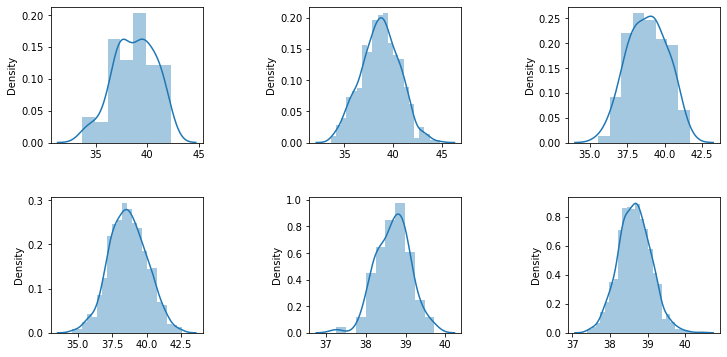

In [28]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.4, wspace=0.7)

plt.subplot(2,3,1)
sns.distplot(sample_mean['100sam_50ele'])

plt.subplot(2,3,2)
sns.distplot(sample_mean['1000sam_50ele'])

plt.subplot(2,3,3)
sns.distplot(sample_mean['100sam_100ele'])

plt.subplot(2,3,4)
sns.distplot(sample_mean['1000sam_100ele'])

plt.subplot(2,3,5)
sns.distplot(sample_mean['100sam_1000ele'])

plt.subplot(2,3,6)
sns.distplot(sample_mean['1000sam_1000ele'])

In [29]:
#sample_mean

In [30]:
for i,key in enumerate(sample_mean.keys()):
    
    key = key
    
    mean = np.mean(sample_mean[key])
    
    print(key ,':', mean)

100sam_50ele : 38.7384
1000sam_50ele : 38.66404
100sam_100ele : 38.8416
1000sam_100ele : 38.653220000000005
100sam_1000ele : 38.686519999999994
1000sam_1000ele : 38.656247


In [31]:
actual_mean = df.iloc[:,0].mean()

print('Actual Mean:', actual_mean)

Actual Mean: 38.64358543876172


In [32]:
def sample_std(num_samp, ele_samp):
    
    std = []
    
    for i in range(0, num_samp):
        
        samples = random.sample(range(0, df.shape[0]), ele_samp)
        
        std.append(df.iloc[samples, 0].std())
        
    return std

In [33]:
sample_sd = {}

sample_sd['100sam_with_50ele'] = sample_std(100, 50)
sample_sd['1000sam_with_50ele'] = sample_std(1000, 50)

sample_sd['100sam_with_100ele'] = sample_std(100, 100)
sample_sd['1000sam_with_100ele'] = sample_std(1000, 100)

sample_sd['100sam_with_1000ele'] = sample_std(100, 1000)
sample_sd['1000sam_with_1000ele'] = sample_std(1000, 1000)

In [34]:
#sample_sd

Text(0.5, 1.0, '1000sam_with_1000ele')

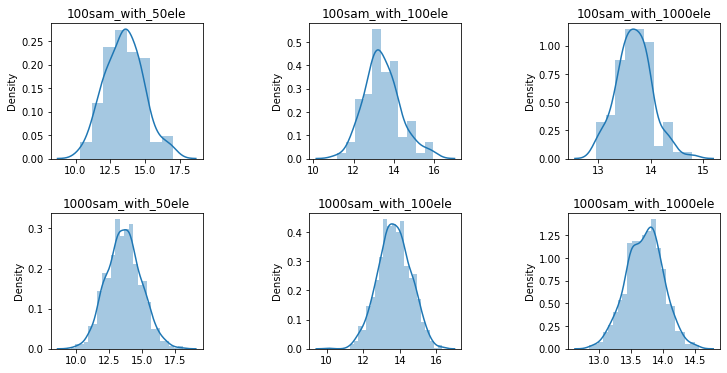

In [35]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4, wspace=0.7)

plt.subplot(2, 3, 1)
sns.distplot(np.array(sample_sd['100sam_with_50ele']))
plt.title('100sam_with_50ele')

plt.subplot(2, 3, 2)
sns.distplot(np.array(sample_sd['100sam_with_100ele']))
plt.title('100sam_with_100ele')

plt.subplot(2, 3, 3)
sns.distplot(np.array(sample_sd['100sam_with_1000ele']))
plt.title('100sam_with_1000ele')

plt.subplot(2, 3, 4)
sns.distplot(np.array(sample_sd['1000sam_with_50ele']))
plt.title('1000sam_with_50ele')

plt.subplot(2, 3, 5)
sns.distplot(np.array(sample_sd['1000sam_with_100ele']))
plt.title('1000sam_with_100ele')

plt.subplot(2, 3, 6)
sns.distplot(np.array(sample_sd['1000sam_with_1000ele']))
plt.title('1000sam_with_1000ele')

In [36]:
for i,key in enumerate(sample_sd.keys()):
    
    key = key
    
    std = np.std(sample_sd[key])
    
    print(key ,':', std)

100sam_with_50ele : 1.3578434652137157
1000sam_with_50ele : 1.313414693119564
100sam_with_100ele : 0.8783255041240339
1000sam_with_100ele : 0.8912435445268354
100sam_with_1000ele : 0.3363629958775705
1000sam_with_1000ele : 0.29057727403454736
